Emily Q. Wang | PHS | Fall 2016

# Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import display
import seaborn as sns
from datetime import timedelta
import scipy
import pprint as pp

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
COLORS = ['#e0ecf4', # light gray-blue 
          '#9ebcda', # darker gray-blue
          '#8856a7'] # purple

BGCOLOR = COLORS[0]
LINEALPHA = 1.0
LINECOLOR = COLORS[2]
LINEWIDTH = 0.5
LINESTYLE = '-'

VLINEALPHA = 0.5
VLINECOLOR = 'k'
VLINEWIDTH = 0.5
VLINESTYLE = '--'

POINCAREALPHA = 0.25
POINCARECOLOR = COLORS[2]
POINCAREMARKER = 'o'

YEQUALSXALPHA = 0.5
YEQUALSXCOLOR = 'k'
YEQUALSXLINESTYLE = '--'

In [4]:
def place_text(x, y, text, axes, specific_fontsize=11):
    axes.text(x, y, text,
              verticalalignment='bottom', horizontalalignment='left',
              transform=axes.transAxes,
              color='k', fontsize=specific_fontsize)
    return

In [5]:
data = pd.read_csv('day1_v2transpose.csv')
display(data.head())

,RRi,RRii,RRi_interp,RRii_interp,freqs,periodogram,low_power,high_power,type_daytime,type,type_interp,type_time_interp,steps_daytime,steps,steps_interp,steps_time_interp,hr_daytime,hr,hr_interp,hr_time_interp,rMSSD,pNN50,Median,gt180
0,79.000000,77.083333,79.0,79.0,0.010000,4441.012781,2397.535137,2855.794416,16.011389,0.0,0.0,16.011389,16.011389,0.0,0.0,16.011389,24.838719,79.000000,79.0,16.011389,640.171653,0.573090,73.0,0.0
1,77.083333,74.636364,79.0,79.0,0.010049,4448.639839,NaN,NaN,16.028056,0.0,0.0,16.028056,16.028056,0.0,0.0,16.028056,24.839685,77.083333,79.0,16.028056,492.368234,0.455786,77.0,0.0
2,74.636364,76.400000,79.0,79.0,0.010098,4456.312152,NaN,NaN,16.044722,0.0,0.0,16.044722,16.044722,0.0,0.0,16.044722,24.839695,74.636364,79.0,16.044722,495.503666,0.486188,74.0,0.0
3,76.400000,78.111111,79.0,79.0,0.010147,4464.029833,NaN,NaN,16.061389,0.0,0.0,16.061389,16.061389,0.0,0.0,16.061389,24.839702,76.400000,79.0,16.061389,NaN,NaN,NaN,NaN
4,78.111111,80.666667,79.0,79.0,0.010196,4471.792992,NaN,NaN,16.078056,0.0,0.0,16.078056,16.078056,0.0,0.0,16.078056,24.839842,78.111111,79.0,16.078056,NaN,NaN,NaN,NaN


## Time Series Heart Rate Signal

Ada's stylistic feedback (strikethrough means it's done):
- ~~Keep the grid~~
- ~~Lines instead of dots~~
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- Iterating on: Vertical boundary lines with activity level numbers (+ a legend or some color code, TBA)
- ~~Check time values on x axis (why does hr_daytime start at 24?)~~

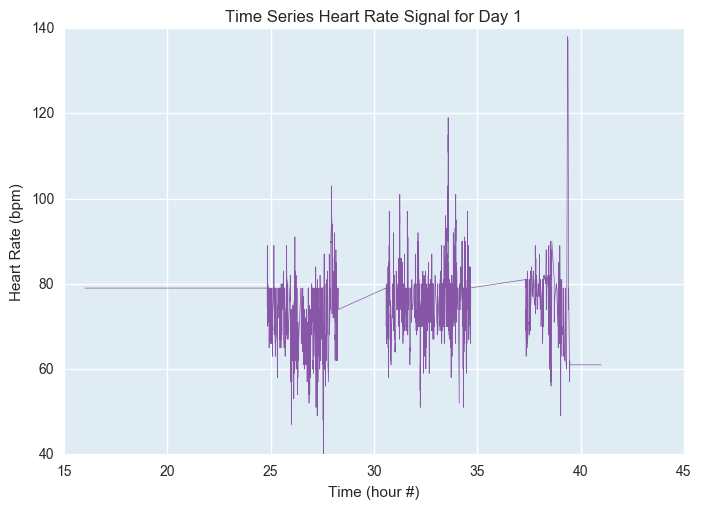

In [6]:
plt.plot(data['hr_time_interp'], 
         data['hr_interp'], 
         linestyle=LINESTYLE, alpha=LINEALPHA, color=LINECOLOR, linewidth=LINEWIDTH)

axes = plt.gca()
axes.set_axis_bgcolor(BGCOLOR)

plt.xlabel('Time (hour #)') 
plt.ylabel('Heart Rate (bpm)')
plt.title('Time Series Heart Rate Signal for Day 1')

plt.savefig('day1_TimeSeriesHeartRateSignal.png', format='png')
plt.show()

## Frequency Domain Signal

Ada's stylistic concerns:
- ~~Keep the grid~~
- ~~Lines instead of dots~~
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- ~~Iterating on: VLF, LF, HF vertical line boundaries and corresponding frequency values at the boundary~~

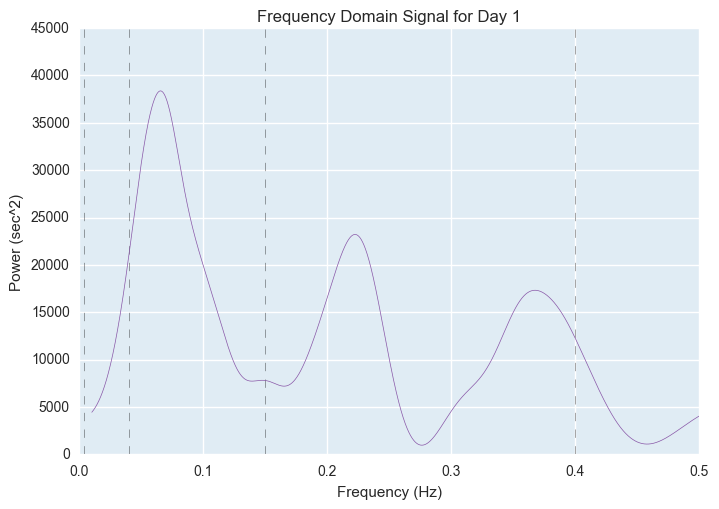

In [7]:
plt.axvline(x=0.0033, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.04, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.15, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.4, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.5, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)

plt.plot(data['freqs'], 
         data['periodogram'], 
         linestyle=LINESTYLE, alpha=LINEALPHA, color=LINECOLOR, linewidth=LINEWIDTH)

lf = data['low_power'][0]
hf = data['high_power'][0]

axes = plt.gca()
axes.set_axis_bgcolor(BGCOLOR)
axes.set_ylim([0, 45000])
# place_text(0.010, 0.92, 'VLF', axes)
# place_text(0.010, -0.01, '0.0033 ', axes, specific_fontsize=9)
# place_text(0.085, 0.92, 'LF power = ' + str(lf)[:-5], axes)
# place_text(0.085, -0.01, '0.04', axes, specific_fontsize=9)
# place_text(0.305, 0.92, 'HF power = ' + str(hf)[:-5], axes)
# place_text(0.305, -0.01, '0.15', axes, specific_fontsize=9)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (sec^2)")
plt.title("Frequency Domain Signal for Day 1")

plt.savefig('day1_FrequencyDomainSignal.png', format='png')
plt.show()

## Poincare Plot

Ada's stylistic concerns:
- ~~Keep the grid~~ 
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- ~~Dotted x=y line~~
- ~~Color coding types of beats - not happening; there was no analysis done to categorize the beats~~
- ~~pNN50 and entropy numbers in a text box, if available~~

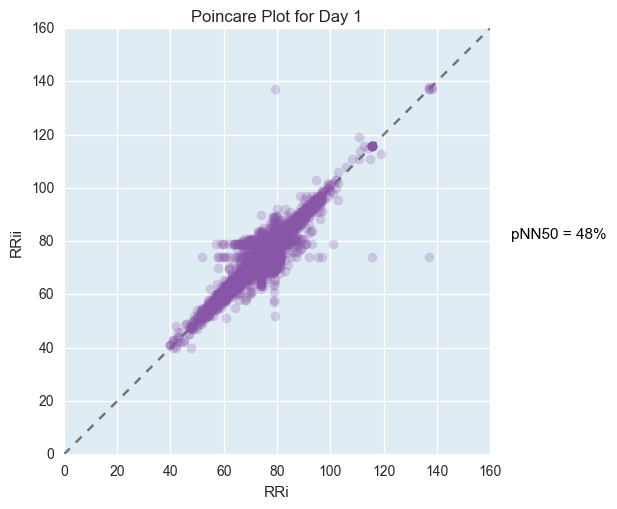

In [8]:
plt.plot(np.arange(0, 160, 0.05), 
         np.arange(0, 160, 0.05), 
         linestyle=YEQUALSXLINESTYLE, alpha=YEQUALSXALPHA, color=YEQUALSXCOLOR) 

plt.plot(data['RRi'], 
         data['RRii'], 
         'o', alpha=POINCAREALPHA, color=POINCARECOLOR)

pNN50 = data['pNN50'][2]

axes = plt.gca()
axes.set_xlim([0, 160])
axes.set_ylim([0, 160])
axes.set_aspect('equal', adjustable='box')
axes.set_axis_bgcolor(BGCOLOR)
place_text(1.05, 0.5, 'pNN50 = ' + str(pNN50)[2:4] + '%', axes)

plt.xlabel('RRi')
plt.ylabel('RRii')
plt.title('Poincare Plot for Day 1')

plt.savefig('day1_PoincarePlot.png', format='png')
plt.show()

## Detrended Fluctuation Analysis

- Plot time series integral
- Parameters for DFA fast and DFA slow
- Best fit lines for each interval